# Linear Support Vector Machines

## Classification Loss vs. Hinge Loss vs. Huberized Hinge Loss vs. Square Hinge Loss

/Users/mich/anaconda/lib/python2.7/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


<IPython.core.display.Javascript object>


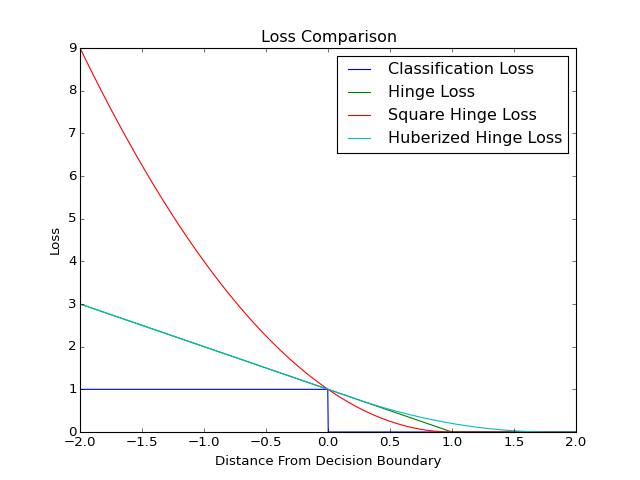

In [1]:
%matplotlib nbagg
import matplotlib.pyplot as plt
plt.clf()
plt.cla()

import numpy as np

ax = plt.subplot(1,1,1)

x_plot=np.linspace(-2,2,1000)
y_plot1=x_plot.copy()
y_plot1[x_plot < 0]=1
y_plot1[x_plot == 0]=0
y_plot1[x_plot > 0]=0
plot1 = ax.plot(x_plot,y_plot1, label='Classification Loss')

y_plot2=np.maximum(np.zeros(x_plot.shape),1-x_plot.copy())
plot2 = ax.plot(x_plot,y_plot2, label='Hinge Loss')

y_plot4=np.power(np.maximum(np.zeros(x_plot.shape),1-x_plot.copy()),2)
plot4 = ax.plot(x_plot,y_plot4, label='Square Hinge Loss')

h=.8
y_plot3= -1 * np.ones(x_plot.shape)
y_plot3[x_plot > 1+h]=0
y_plot3[x_plot < 1-h]=1-x_plot[x_plot < 1-h]
y_plot3[y_plot3 == -1]= ((1+h-x_plot[y_plot3 == -1])**2)/(4*h)
plot3 = ax.plot(x_plot,y_plot3, label='Huberized Hinge Loss')

handles, labels = ax.get_legend_handles_labels()
plt.legend(handles, labels)
plt.title('Loss Comparison')
plt.ylabel('Loss')
plt.xlabel('Distance From Decision Boundary')

## Analytic Expressions

Let $X \in R^{n \times d+1}$ and $y = (y_1,...,y_n)^T \in R^{n+1}$ and $\texttt{loss}(...) \ge 0$

Objective function: 
$$F(w) = \|w\|^2 + \frac Cn \|\texttt{loss}(y,Xw)\|_1$$

Clearly,
$$(\vec\nabla F(w))_j = 2w_j + \frac Cn \sum^{n}_{i=1}\frac{d}{d(Xw)_i}\texttt{loss}(y_i,(Xw)_i) \cdot X_{i,j} \quad \texttt{for} ~j = 1,2,...,d+1$$


###### For Hinge Loss:
$$l_{hinge}(y,t) := \max(0, 1 - yt)$$
Then
$$\frac{d}{dt}l_{hinge}(y,t) := \begin{cases} 0, & \mbox{if } 1-yt \lt 0\\ 
-y, & \mbox{if } 1-yt \gt 0  \end{cases}$$
And
$$F(w) = \|w\|^2 + \frac Cn \sum^n\max(0, 1 - y*(Xw))$$
And $\texttt{for j = 1,2,...,d+1}$
$$(\vec\nabla F(w))_j = \begin{cases} 2w_j, & \mbox{if } 1-y*(Xw) \lt 0\\
2w_j + \frac Cn \sum^{n}_{i=1} -y \cdot X_{i,j}, & \mbox{if } 1-y*(Xw) \gt 0  \end{cases}$$
Where $y*(Xw) \in R^{n}$<br />


###### For Square Hinge Loss:
$$l_{square-hinge}(y,t) := \max(0, 1 - yt)^2$$
Then
$$\frac{d}{dt}l_{square-hinge}(y,t) := \begin{cases} 0, & \mbox{if } 1-yt \lt 0\\ 
2(1 - yt)(-y), & \mbox{if } 1-yt \gt 0  \end{cases}$$
And
$$F(w) = \|w\|^2 + \frac Cn \sum^n\max(0, 1 - y*(Xw))^2$$
And $\texttt{for j = 1,2,...,d+1}$
$$(\vec\nabla F(w))_j = \begin{cases} 2w_j, & \mbox{if } 1-y*(Xw) \le 0\\
2w_j + \frac Cn \sum^{n}_{i=1} 2(1 - y*(Xw))(-y) \cdot X_{i,j}, & \mbox{if } 1-y*(Xw) \gt 0  \end{cases}$$
Where $y*(Xw) \in R^{n}$<br />


###### For Huberized Hinge Loss:
$$l_{huber-hinge}(y,t) := \begin{cases} 0, & \mbox{if } yt \gt 1+h\\ 
\frac{(1+h-yt)^2}{4h}, & \mbox{if } |1-yt| \le h \\ 
1-yt, & \mbox{if } yt \lt 1-h \end{cases}$$

$$\frac{d}{dt}l_{huber-hinge}(y,t) := \begin{cases} 0, & \mbox{if } yt \gt 1+h\\ 
\frac{2(1+h-yt)(-y)}{4h}, & \mbox{if } |1-yt| \le h \\ 
-y, & \mbox{if } yt \lt 1-h \end{cases}$$


We have continuity in $\frac{d}{dt}l_{huber-hinge}(y,t)$ since the derivatives limits' agree at the critical points;
$$ \lim_{t^+ \rightarrow \frac{1+h}{y} } \frac{d}{dt}l_{huber-hinge}(y,t) = 0$$
$$ \lim_{t^- \rightarrow \frac{1+h}{y} } \frac{d}{dt}l_{huber-hinge}(y,t) = \lim_{t^- \rightarrow \frac{1+h}{y} } \frac{2(1+h-yt)(-y)}{4h} = \lim_{t^- \rightarrow \frac{1+h}{y} } \frac{2(1+h-y\frac{1+h}{y})(-y)}{4h} = 0$$
So
$$ \lim_{t^+ \rightarrow \frac{1+h}{y} } \frac{d}{dt}l_{huber-hinge}(y,t) = \lim_{t^- \rightarrow \frac{1+h}{y} } \frac{d}{dt}l_{huber-hinge}(y,t)$$
And
$$ \lim_{t^+ \rightarrow \frac{1-h}{y} } \frac{d}{dt}l_{huber-hinge}(y,t) = \lim_{t^+ \rightarrow \frac{1-h}{y} } \frac{2(1+h-yt)(-y)}{4h}  = \lim_{t^+ \rightarrow \frac{1-h}{y} } \frac{2(1+h-y\frac{1-h}{y})(-y)}{4h} = -y$$
$$\lim_{t^- \rightarrow \frac{1-h}{y} } \frac{d}{dt}l_{huber-hinge}(y,t) = \lim_{t^- \rightarrow \frac{1-h}{y} } -y = -y $$
So
$$ \lim_{t^+ \rightarrow \frac{1-h}{y} } \frac{d}{dt}l_{huber-hinge}(y,t) = \lim_{t^- \rightarrow \frac{1-h}{y} } \frac{d}{dt}l_{huber-hinge}(y,t)$$


Also note for Huberized Hinge Loss:
$$F(w) = \begin{cases} \|w\|^2, & \mbox{if } y*(Xw) \gt 1+h\\ 
\|w\|^2 + \frac Cn \sum^n_1 \frac{(1+h-y*(Xw))^2}{4h}, & \mbox{if } |1-y*(Xw)| \le h \\ 
\|w\|^2 + \frac Cn \sum^n_1 1-y*(Xw), & \mbox{if } y*(Xw) \lt 1-h \end{cases}$$
Where $y*(Xw) \in R^{n}$<br />
And $\texttt{for j = 1,2,...,d+1}$
$$(\vec\nabla F(w))_j = \begin{cases} 2w_j, & \mbox{if } y*(Xw) \gt 1+h\\ 
2w_j + \frac Cn \sum^n_1 \frac{2(1+h-y*(Xw))(-y)}{4h}*(Xw), & \mbox{if } |1-y*(Xw)| \le h \\ 
2w_j + \frac Cn \sum^n_1 -yX_{ij}, & \mbox{if } y*(Xw) \lt 1-h \end{cases}$$
Where $y*(Xw) \in R^{n}$<br />


## SVM Implementation

In [10]:
from sklearn.datasets import make_regression
from sklearn.cross_validation import train_test_split
from sklearn.kernel_ridge import KernelRidge
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
import matplotlib.pyplot as plt
import sys
import numpy as np
from numpy.linalg import norm
from numpy.random import randint
import random
import math
import time 


def loss_hinge(y,t): # const
    return max(0,1-(y*t))


def loss_hinge_der(y,t): # const
    if 1-(y*t) <= 0:
        return 0
    return -y


def loss_huber_hinge(y,t,h): # const
    if y*t > 1+h:
        return 0
    if abs(1-(y*t)) <= h:
        return pow((1+h-(y*t)),2)/(4*h)
    if y*t < 1-h:
        return 1 - (y*t)

def loss_huber_hinge_der(y,t,h): # const
    if y*t > 1+h:
        return 0
    if abs(1-(y*t)) <= h:
        return 2*(1+h-(y*t))*(-y)/(4*h)
    if y*t < 1-h:
        return -y


def loss(y,t,loss_type,h): # const
    if loss_type=='hinge':
        return loss_hinge(y,t)
    if loss_type=='modified_huber':
        return loss_huber_hinge(y,t,h)


def loss_der(y,t,loss_type,h): # const
    if loss_type=='hinge':
        return loss_hinge_der(y,t)
    if loss_type=='modified_huber':
        return loss_huber_hinge_der(y,t,h)


def compute_obj(w,C,X,y,loss_type,h): # const
    ret = 0.0
    assert len(X)==len(y)
    assert len(X[0])==len(w)
    for i in range(len(X)):
        ret += loss(y[i],np.dot(X[i],w),loss_type,h)
    return norm(w)**2 + C*ret/len(X)


def compute_grad(w,C,X,y,loss_type,h): # const
    if len(X)==len(w):
        grad = 2*w.copy()
        for i in range(len(w)):
            grad[i] += C*(loss_der(y,np.dot(X,w),loss_type,h)*X[i])
        return grad
    if len(X)==len(y) and len(X[0])==len(w):
        n=len(X)
        X[n-1,len(w)-1]
        grad = 2*w.copy()
        for i in range(len(w)):
            loss_sum = 0.0
            for j in range(n):
                loss_sum += \
                    loss_der(y[j],np.dot(X[j],w),loss_type,h)*X[j,i]
            grad[i] += C/n*loss_sum
        return grad
    assert False


def numer_grad(w,ep,delta,C,X,y,loss_type,h): # const
    return (compute_obj(w+(ep*delta),C,X,y,loss_type,h) \
           -compute_obj(w-(ep*delta),C,X,y,loss_type,h))/(2*ep)


def grad_checker(w0,C,X,y,loss_type,h): # const
    ep=.0001
    delta=0
    d=len(w0)
    w=[]
    for i in range(d):
        delta=np.zeros(w0.shape)
        delta[i] = 1
        w.append(numer_grad(w0,ep,delta,C,X,y,loss_type,h))
    return np.asarray(w)


def score(X, y, w): # const
    error = 0.0
    error_comp = 0.0
    for i in range(len(X)):
        prediction = np.sign(np.dot(w,X[i]))
        if prediction == 1 and y[i] == 1:
            error += 1
        elif (prediction == -1 or prediction == 0) and y[i] == -1:
            error += 1
        else:
            error_comp += 1
    return 'correct',error/len(X), 'failed',error_comp/len(X)


def my_gradient_descent(X,y,w0=None,initial_step_size=.1,max_iter=1000,C=1,
                        loss_type=None,h=.01,X_test=None, y_test=None,stochastic=False,back_track=True): # const
    tol=10**-4 # scikit learn default
    if w0 == None:
        w0 = np.zeros(len(X[0]))
    if len(X) == 0:
        return 'Error'
    diff = -1
    grad = -1
    
    w = w0
    obj_array = []

    training_error_array = []
    training_error_array.append(score(X, y, w=w))

    testing_error_array = []
    testing_error_array.append(score(X_test, y_test, w=w))
    
    w_array = []
    w_array.append(w.copy())
    
    for i in range(max_iter):
#         print 'i',i
        obj=compute_obj(w,C,X,y,loss_type,h)
#         print 'obj',obj
        obj_array.append(obj)
        w_p = w
        if stochastic:
            random_index = randint(1,len(X))
            grad = compute_grad(w,C,X[random_index],y[random_index],loss_type,h)
        else:
            grad = compute_grad(w,C,X,y,loss_type,h)
            assert norm(grad-grad_checker(w,C,X,y,loss_type,h)) < 10**-2
#         print 'grad',grad
        if norm(grad) < tol:
            break
        
        step_size = initial_step_size
        if back_track:
            while obj < compute_obj(w - (step_size * grad),C,X,y,loss_type,h):
                step_size = step_size/2.0
                if step_size < .00000001:
                    break
#         print 'step_size',step_size
        w += - step_size * grad
#         print 'w',w

        w_array.append(w.copy())
        training_error_array.append(score(X, y, w=w))
        testing_error_array.append(score(X_test, y_test, w=w))

        if training_error_array[len(training_error_array)-1][1] > 0.99:
            break
        
        diff = norm(w-w_p)
    if norm(grad) > tol:
        print 'Warning: Did not converge.'
    return w, w_array, obj_array, training_error_array, testing_error_array


def my_sgd(X,y,w0=None,step_size=.01,max_iter=1000,C=1,loss_type=None,h=.01,X_test=None, 
           y_test=None,stochastic=False): # const
    return my_gradient_descent(X_train, y_train,w0=w0,
                               loss_type=loss_type,
                               max_iter=max_iter,
                               h=h,C=C,X_test=X_test, 
                               y_test=y_test,
                               stochastic=stochastic)
    


def my_svm(X_train, y_train,loss_type=None,max_iter=None,h=None,C=None,X_test=None, y_test=None, 
           stochastic=False): # const
    w0=np.zeros(len(X_train[0]))
    if stochastic:
        w, w_array, obj_array, training_error_array, testing_error_array = my_sgd(X_train, y_train,w0=w0,
                                                                                   loss_type=loss_type,
                                                                                   max_iter=max_iter,
                                                                                   h=h,C=C,X_test=X_test, 
                                                                               y_test=y_test,stochastic=True)
    else:
        w, w_array, obj_array, training_error_array, testing_error_array = \
                        my_gradient_descent(X_train, y_train,w0=w0, loss_type=loss_type, max_iter=max_iter, h=h,C=C,
                                            X_test=X_test, y_test=y_test, stochastic=stochastic)
    return w, w_array, obj_array, training_error_array, testing_error_array
    

## SVM Gradient Descent Usage Example

In [11]:
# Generate data
'''Generate 2 Gaussians samples with the same covariance matrix'''
n, dim = 500, 2
np.random.seed(0)
C = np.array([[0., -0.23], [0.83, .23]])
gap = 1
X = np.r_[np.dot(np.random.randn(n, dim)+gap, C),
          np.dot(np.random.randn(n, dim)-gap, C)]

# append constant dimension
X = np.column_stack((X, np.ones(X.shape[0])))

y = np.hstack((-1*np.ones(n), np.ones(n)))

assert len(X[y==-1])==len(y[y==-1]);assert len(X[y==1])==len(y[y==1]);assert len(X)==len(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.5, random_state=20140210)

assert len(X_train)>1;assert len(X_test)>1;assert len(X_train)==len(y_train);assert len(X_test)==len(y_test)

max_iter=1000
C=1.0

for loss_type in ['modified_huber','hinge']:
    for h_index in range(1,10):
        h=(.1*(1.1**h_index))
        print 'parameters: loss_type',loss_type,'h',h

        w, w_array, obj_array, training_error_array, testing_error_array = my_svm(X_train, y_train,
                                                                                  loss_type=loss_type,
                                                                                  max_iter=max_iter,h=h,C=C,
                                                                                  X_test=X_test, y_test=y_test,
                                                                                  stochastic=False)
        print 'Custom w =',w,' test score = ',score(X_test, y_test, w=w)

        clf = SGDClassifier(loss=loss_type, penalty="l2",alpha=1/C, fit_intercept=False)
        clf.fit(X_train, y_train);        assert clf.intercept_ == 0
        print 'SGDClassifier w = ',clf.coef_[0],' test score = ',score(X_test, y_test, 
                                                                       w=clf.coef_[0])
        clf = LinearSVC( penalty="l2",C=C, fit_intercept=False); clf.fit(X_train, y_train); assert clf.intercept_ == 0
        print 'LinearSVC w = ',clf.coef_[0],' test score = ',score(X_test, y_test, w=clf.coef_[0])
        print
        print
#         break
#     break

parameters: loss_type modified_huber h 0.11
Custom w = [-0.37883235 -0.00094899  0.00553782]  test score =  ('correct', 0.85, 'failed', 0.15)
SGDClassifier w =  [-0.46127166  0.13011518 -0.00498563]  test score =  ('correct', 0.872, 'failed', 0.128)
LinearSVC w =  [-1.54532443  2.73645895 -0.03684543]  test score =  ('correct', 0.934, 'failed', 0.066)


parameters: loss_type modified_huber h 0.121
Custom w = [-0.37856912 -0.00089322  0.00555948]  test score =  ('correct', 0.85, 'failed', 0.15)
SGDClassifier w =  [-0.46409046  0.13010087 -0.00243389]  test score =  ('correct', 0.872, 'failed', 0.128)
LinearSVC w =  [-1.5453255   2.73645985 -0.03684486]  test score =  ('correct', 0.934, 'failed', 0.066)


parameters: loss_type modified_huber h 0.1331
Custom w = [-0.37833309 -0.00086592  0.00557005]  test score =  ('correct', 0.85, 'failed', 0.15)
SGDClassifier w =  [ -4.62116648e-01   1.29701474e-01  -1.74064845e-04]  test score =  ('correct', 0.872, 'failed', 0.128)
LinearSVC w =  [-1.5

/Users/mich/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:121: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


## SVM Stochastic Gradient Descent Usage Example

In [ ]:
# Generate data
'''Generate 2 Gaussians samples with the same covariance matrix'''
n, dim = 2*(10**7), 2
n, dim = 500, 2
np.random.seed(0)
C = np.array([[0., -0.23], [0.83, .23]])
gap = 1
X = np.r_[np.dot(np.random.randn(n, dim)+gap, C),
          np.dot(np.random.randn(n, dim)-gap, C)]

# append constant dimension
X = np.column_stack((X, np.ones(X.shape[0])))

y = np.hstack((-1*np.ones(n), np.ones(n)))

assert len(X[y==-1])==len(y[y==-1]);assert len(X[y==1])==len(y[y==1]);assert len(X)==len(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=20140210)

assert len(X_train)>1;assert len(X_test)>1;assert len(X_train)==len(y_train);assert len(X_test)==len(y_test)

max_iter=1000
C=1.0

for loss_type in ['modified_huber','hinge']:
    for h_index in range(1,10):
        h=(.1*(1.1**h_index))
        print 'parameters: loss_type',loss_type,'h',h
        w, w_stoch_array, obj_stoch_array, training_error_stoch_array, testing_error_stoch_array = \
        my_svm(X_train, 
            y_train, loss_type=loss_type, max_iter=max_iter,h=h,C=C, X_test=X_test, y_test=y_test,stochastic=True)

        print 'Custom w =',w,' test score = ',score(X_test, y_test, w=w)

        clf = SGDClassifier(loss=loss_type, penalty="l2",alpha=1/C, fit_intercept=False);clf.fit(X_train, y_train)
        assert clf.intercept_ == 0
        print 'SGDClassifier w = ',clf.coef_[0],' test score = ',score(X_test, y_test, w=clf.coef_[0])
        
        clf = LinearSVC( penalty="l2",C=C, fit_intercept=False)
        clf.fit(X_train, y_train)
        assert clf.intercept_ == 0
        print 'LinearSVC w = ',clf.coef_[0],' test score = ',score(X_test, y_test, w=clf.coef_[0])
        print
        print
#         break
#     break

<IPython.core.display.Javascript object>


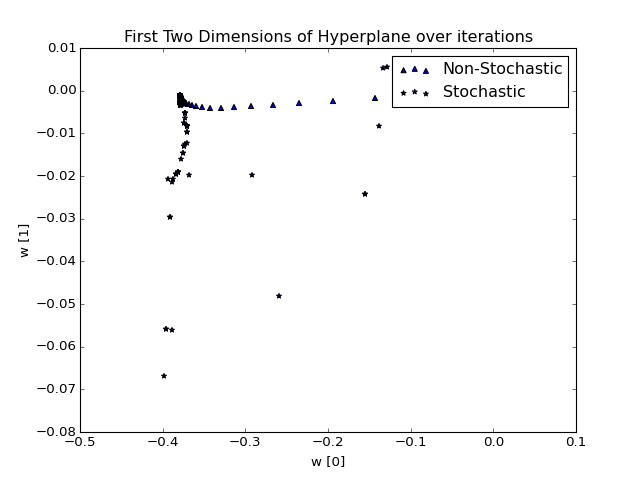

In [5]:
%matplotlib nbagg
plt.clf()
plt.cla()

ax = plt.subplot(1,1,1)

w_array = np.asarray(w_array)
ax.scatter(w_array[:,0],w_array[:,1],marker='^',label='Non-Stochastic')

w_stoch_array = np.asarray(w_stoch_array)
ax.scatter(w_stoch_array[:,0],w_stoch_array[:,1],marker='*',label='Stochastic')

handles, labels = ax.get_legend_handles_labels()
plt.legend(handles, labels)
plt.title('First Two Dimensions of Hyperplane over iterations')
plt.ylabel('w [1]')
plt.xlabel('w [0]')

<IPython.core.display.Javascript object>


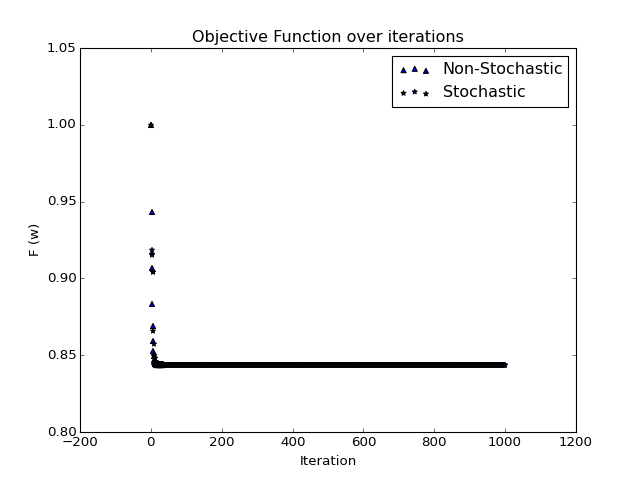

In [6]:
%matplotlib nbagg
plt.clf()
plt.cla()

ax = plt.subplot(1,1,1)

obj_array = np.asarray(obj_array)
ax.scatter(range(1,len(obj_array)+1),obj_array,marker='^',label='Non-Stochastic')

obj_stoch_array = np.asarray(obj_stoch_array)
ax.scatter(range(1,len(obj_stoch_array)+1),obj_stoch_array,marker='*',label='Stochastic')

handles, labels = ax.get_legend_handles_labels()
plt.legend(handles, labels)
plt.title('Objective Function over iterations')
plt.ylabel('F (w)')
plt.xlabel('Iteration')

<IPython.core.display.Javascript object>


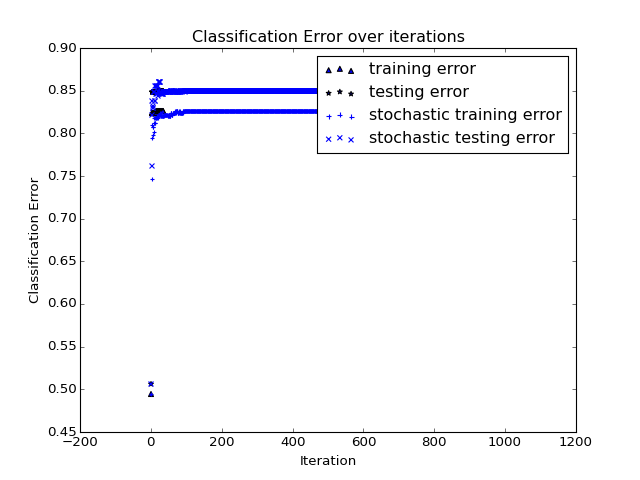

In [7]:
%matplotlib nbagg
plt.clf()
plt.cla()

ax = plt.subplot(1,1,1)

training_error_array = np.asarray(training_error_array)
testing_error_array = np.asarray(testing_error_array)
ax.scatter(range(1,len(training_error_array)+1),training_error_array[:,1],marker='^',label='training error')
ax.scatter(range(1,len(testing_error_array)+1),testing_error_array[:,1],marker='*',label='testing error')

training_error_stoch_array = np.asarray(training_error_stoch_array)
testing_error_stoch_array = np.asarray(testing_error_stoch_array)
ax.scatter(range(1,len(training_error_stoch_array)+1),training_error_stoch_array[:,1],marker='+',
           label='stochastic training error')
ax.scatter(range(1,len(testing_error_stoch_array)+1),testing_error_stoch_array[:,1],marker='x',
           label='stochastic testing error')

handles, labels = ax.get_legend_handles_labels()
plt.legend(handles, labels)
plt.title('Classification Error over iterations')
plt.ylabel('Classification Error')
plt.xlabel('Iteration')

<IPython.core.display.Javascript object>


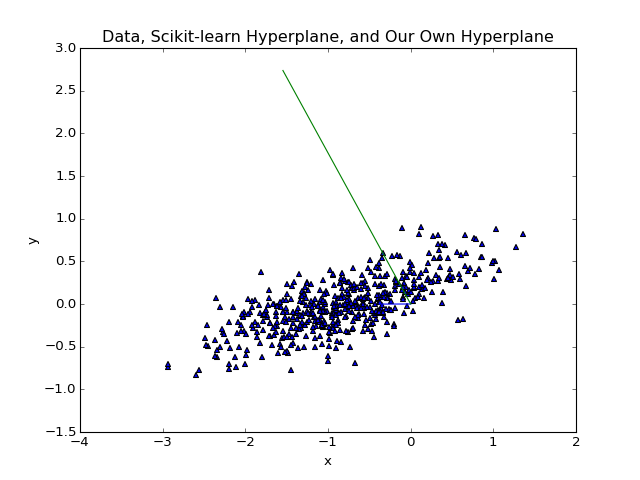

In [8]:
%matplotlib nbagg
plt.clf()
plt.cla()

ax = plt.subplot(1,1,1)

# print w
x_plot=[w[0], 0]
y_plot=[w[1], 0]
ax.plot(x_plot,y_plot)

# print clf.coef_[0]
x_plot=[clf.coef_[0][0], 0]
y_plot=[clf.coef_[0][1], 0]
ax.plot(x_plot,y_plot)

ax.scatter((X[y==0])[:,0],(X[y==0])[:,1],marker='*')
ax.scatter((X[y==1])[:,0],(X[y==1])[:,1],marker='^')

handles, labels = ax.get_legend_handles_labels()
plt.title('Data, Scikit-learn Hyperplane, and Our Own Hyperplane')
plt.ylabel('y')
plt.xlabel('x')